In [2]:
library(DropletUtils)
library(scds)
library(feather)
library(Matrix)
library(SoupX)
library(data.table)
library(Seurat)

In [3]:
dataDirs1 = c("/Monkey_P_Caudate_Rep2")

In [7]:
toc = Seurat::Read10X(file.path(dataDirs1, "filtered_feature_bc_matrix", "soupx_data"))
tod = Seurat::Read10X(file.path(dataDirs1, "raw_feature_bc_matrix", "soupx_data"))
#sc = SoupChannel(tod, toc)

In [8]:
sc1 = SoupChannel(tod, toc, calcSoupProfile = FALSE)
sc1 = estimateSoup(sc1)

In [9]:
sc1

Channel with 54894 genes and 4420 cells



In [10]:
str(sc1)

List of 4
 $ toc        :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:15699723] 50 59 61 62 76 83 86 88 97 105 ...
  .. ..@ p       : int [1:4421] 0 6269 8213 15299 20421 23747 25583 32380 34332 41732 ...
  .. ..@ Dim     : int [1:2] 54894 4420
  .. ..@ Dimnames:List of 2
  .. .. ..$ : chr [1:54894] "WASH7P" "MIR6859-1" "MIR1302-2HG" "MIR1302-2" ...
  .. .. ..$ : chr [1:4420] "AAACCCAAGGTAGCCA-1" "AAACCCACAGACAAAT-1" "AAACCCAGTACCCAGC-1" "AAACCCAGTCCTCCTA-1" ...
  .. ..@ x       : num [1:15699723] 1 1 1 1 5 1 1 1 1 2 ...
  .. ..@ factors : list()
 $ metaData   :'data.frame':	4420 obs. of  1 variable:
  ..$ nUMIs: num [1:4420] 22585 3137 27079 15757 7305 ...
 $ nDropUMIs  : Named num [1:6794880] 1 0 2 0 0 0 0 0 0 0 ...
  ..- attr(*, "names")= chr [1:6794880] "AAACCCAAGAAACACT-1" "AAACCCAAGAAACCAT-1" "AAACCCAAGAAACCCA-1" "AAACCCAAGAAACCCG-1" ...
 $ soupProfile:'data.frame':	54894 obs. of  2 variables:
  ..$ est   : num [1:54894] 0 0 0 0 0 ...
  ..$ c

In [11]:
#set PBMC_DR
set.seed(1)

In [12]:
srat = CreateSeuratObject(sc1$toc)

In [13]:
srat = NormalizeData(srat)

In [14]:
srat = ScaleData(srat)

Centering and scaling data matrix



In [15]:
#srat = FindVariableGenes(srat)
srat = FindVariableFeatures(srat)

In [16]:
srat = RunPCA(srat,pcs.compute=30)

PC_ 1 
Positive:  SLC1A2, NEAT1, SLC1A3, SPARCL1, ADGRV1, ACACB, TMTC2, PDZRN4, C1orf61, FBXL7 
	   LRIG1, C1orf21, PREX2, MFGE8, ALDH1A1, ATP13A4, PRKCA, ETNPPL, SLC15A2, LUZP2 
	   NHSL1, ACSBG1, AC008957.2, GLI3, F3, SLC25A18, GLIS3, FARP1, AL355612.1, PRDM16 
Negative:  DLGAP2, PTPRN2, PDE10A, PDE1B, MYT1L, CACNA1E, SLIT3, RYR2, RYR3, AC005906.2 
	   SLC35F3, CACNA2D3, CELF5, ADCY5, ABLIM2, BCL11B, GABRB3, ROBO2, FGF14, GALNT17 
	   LRRC7, DGKI, ACTN1, PTPN5, KIAA1211L, DPP6, SCN2A, INPP5A, SMPD3, TENM2 
PC_ 2 
Positive:  MBP, DOCK10, ST18, ZNF536, MOBP, GARNL3, ENPP2, RNF220, C10orf90, PIP4K2A 
	   PLCL1, MOG, ST6GALNAC3, PEX5L, CNDP1, OPALIN, CLMN, KIF13B, PDE8A, TMEM144 
	   AJ009632.2, CREB5, MYRF, MAG, AL359091.1, PLLP, ZEB2, FA2H, SHROOM4, ABCA8 
Negative:  LINC00499, ADGRV1, GLI3, LUCAT1, SLC25A18, ATP13A4, ACSBG1, CABLES1, OLFM2, MFGE8 
	   PDZRN4, ITGB4, ALDH1A1, PREX2, PRDM16, GPC6, AL355612.1, ACOT11, ETNPPL, ZBTB7C 
	   C1orf61, GPAM, GLIS3, FARP1, L3MBTL4, F3, SLC15A2,

In [17]:
srat = RunTSNE(srat,dims.use=seq(30))

In [18]:
srat <- FindNeighbors(srat, dims = 1:30)

Computing nearest neighbor graph

Computing SNN



In [19]:
srat = FindClusters(srat, resolution = 0.5)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4420
Number of edges: 187509

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9199
Number of communities: 15
Elapsed time: 0 seconds


In [20]:
str(srat)

Formal class 'Seurat' [package "Seurat"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "Seurat"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:15699723] 50 59 61 62 76 83 86 88 97 105 ...
  .. .. .. .. .. ..@ p       : int [1:4421] 0 6269 8213 15299 20421 23747 25583 32380 34332 41732 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 54894 4420
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:54894] "WASH7P" "MIR6859-1" "MIR1302-2HG" "MIR1302-2" ...
  .. .. .. .. .. .. ..$ : chr [1:4420] "AAACCCAAGGTAGCCA-1" "AAACCCACAGACAAAT-1" "AAACCCAGTACCCAGC-1" "AAACCCAGTCCTCCTA-1" ...
  .. .. .. .. .. ..@ x       : num [1:15699723] 1 1 1 1 5 1 1 1 1 2 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:15699723] 50 59 61 62 76 83 86 88 9

In [21]:
PBMC_DR = as.data.frame(srat$tsne@cell.embeddings)

In [22]:
colnames(PBMC_DR) = c('RD1','RD2')

In [23]:
str(PBMC_DR)

'data.frame':	4420 obs. of  2 variables:
 $ RD1: num  -5.34 17.63 -12.48 -3.74 -13.77 ...
 $ RD2: num  25.02 -2.1 25.51 14.85 -6.09 ...


In [24]:
PBMC_DR$Cluster = factor(srat@meta.data[rownames(PBMC_DR),'RNA_snn_res.0.5'])

In [25]:
str(srat@meta.data)

'data.frame':	4420 obs. of  5 variables:
 $ orig.ident     : Factor w/ 1 level "SeuratProject": 1 1 1 1 1 1 1 1 1 1 ...
 $ nCount_RNA     : num  22585 3137 27079 15757 7305 ...
 $ nFeature_RNA   : int  6269 1944 7086 5122 3326 1836 6797 1952 7400 661 ...
 $ RNA_snn_res.0.5: Factor w/ 15 levels "0","1","2","3",..: 2 5 2 4 1 12 2 3 2 5 ...
 $ seurat_clusters: Factor w/ 15 levels "0","1","2","3",..: 2 5 2 4 1 12 2 3 2 5 ...


In [23]:
getwd()

[1] "/home/stauffer/Documents/Jing/p01_scRNA_striatum/Peanut/1_soupx"

In [25]:
#saveRDS(PBMC_DR, file = "~/Documents/Jing/p01_scRNA_striatum/Peanut/1_soupx/caudate_04_DR.rds")

In [26]:
#PBMC_DR <- readRDS("caudate_04_DR.rds")

In [27]:
str(PBMC_DR)

'data.frame':	4420 obs. of  3 variables:
 $ RD1    : num  -5.34 17.63 -12.48 -3.74 -13.77 ...
 $ RD2    : num  25.02 -2.1 25.51 14.85 -6.09 ...
 $ Cluster: Factor w/ 15 levels "0","1","2","3",..: 2 5 2 4 1 12 2 3 2 5 ...


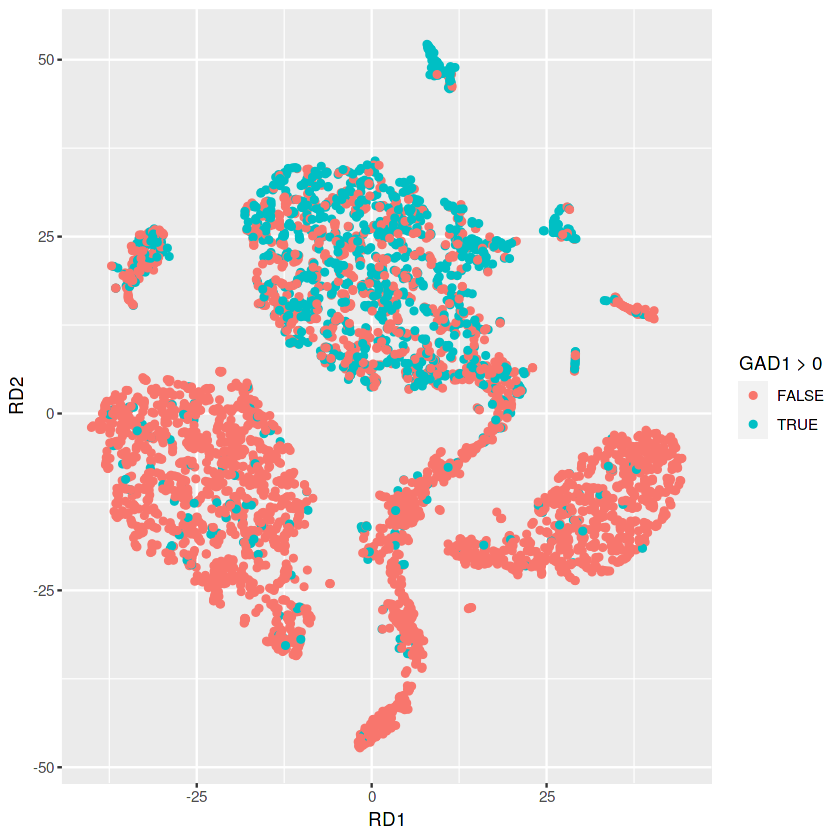

In [28]:
library(ggplot2)
PBMC_DR$GAD1 = sc1$toc["GAD1", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = GAD1 > 0))
plot(gg)

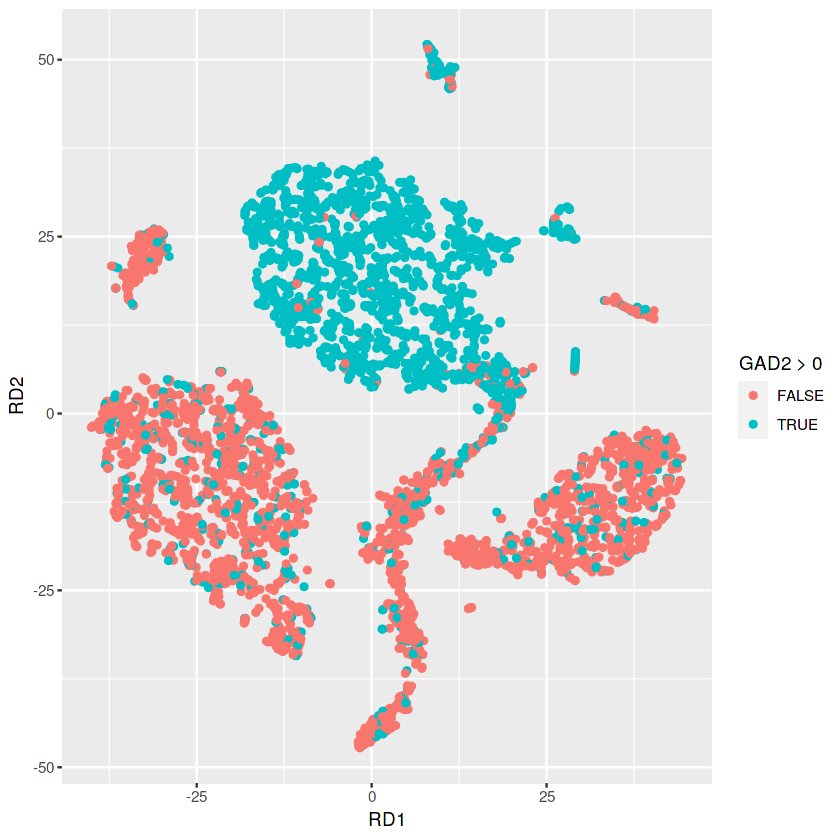

In [29]:
library(ggplot2)
PBMC_DR$GAD2 = sc1$toc["GAD2", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = GAD2 > 0))
plot(gg)

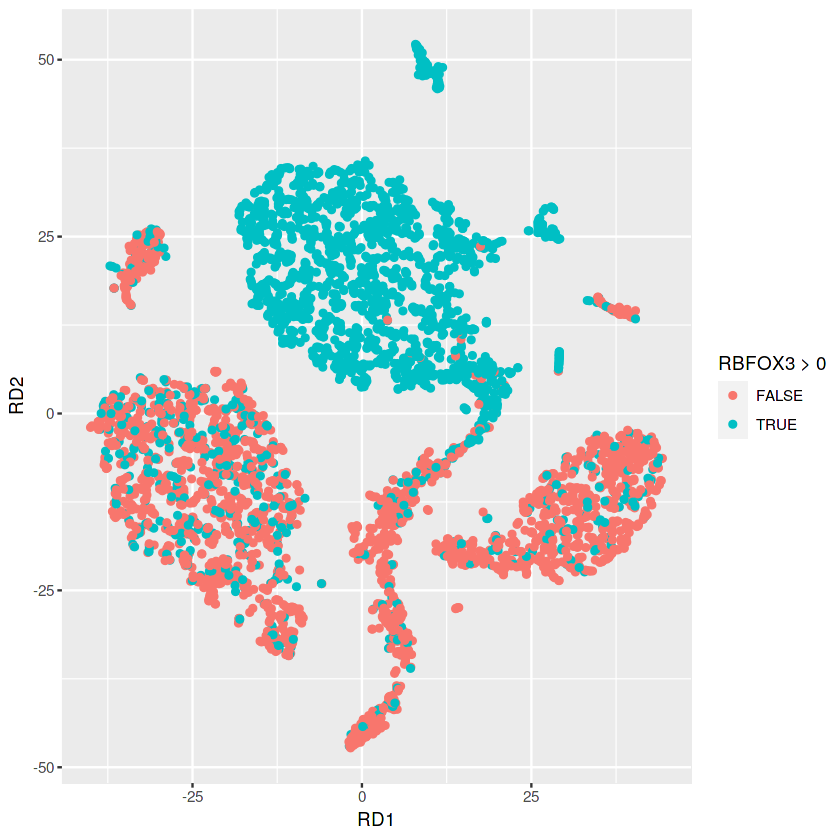

In [30]:
library(ggplot2)
PBMC_DR$RBFOX3 = sc1$toc["RBFOX3", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = RBFOX3 > 0))
plot(gg)

In [31]:
library(ggplot2)
PBMC_DR$SLC17A7 = sc1$toc["SLC17A7", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = SLC17A7 > 0))
plot(gg)

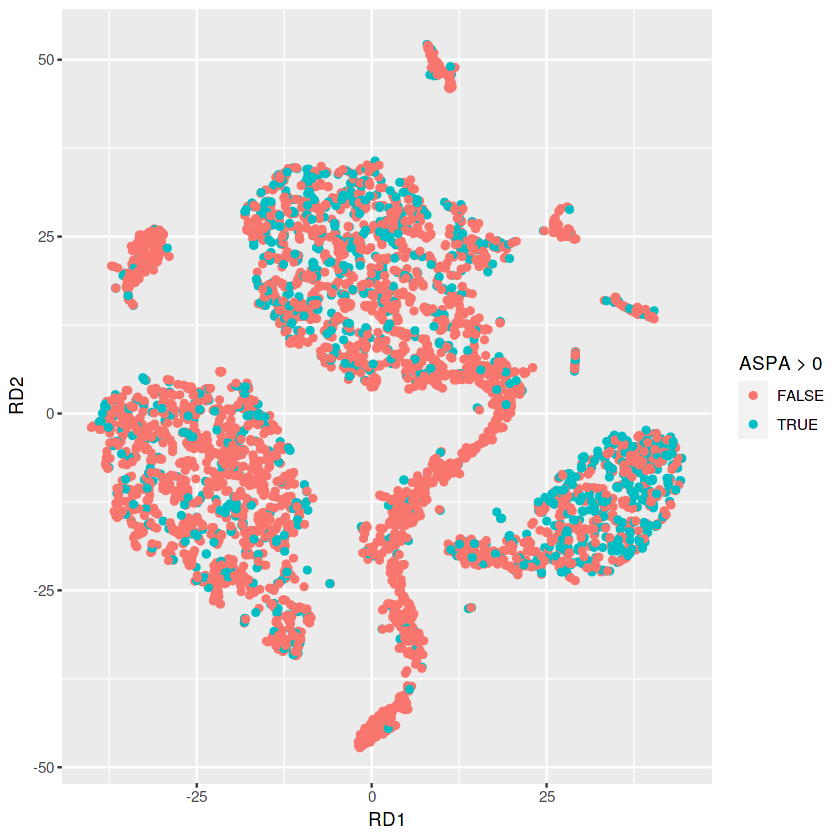

In [32]:
library(ggplot2)
PBMC_DR$ASPA = sc1$toc["ASPA", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = ASPA > 0))
plot(gg)

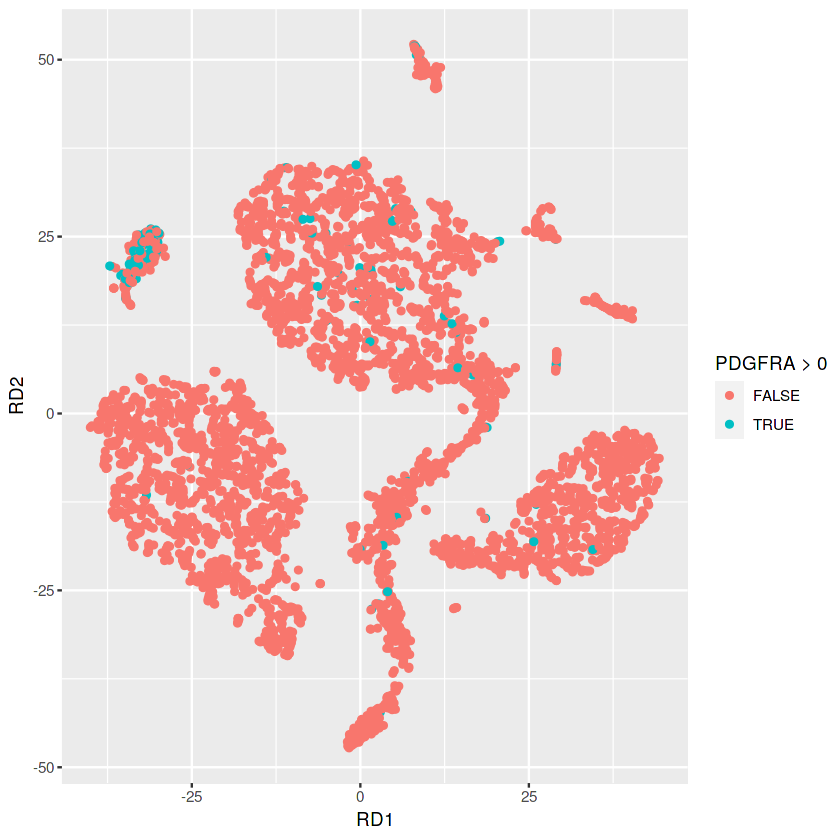

In [33]:
library(ggplot2)
PBMC_DR$PDGFRA = sc1$toc["PDGFRA", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = PDGFRA > 0))
plot(gg)

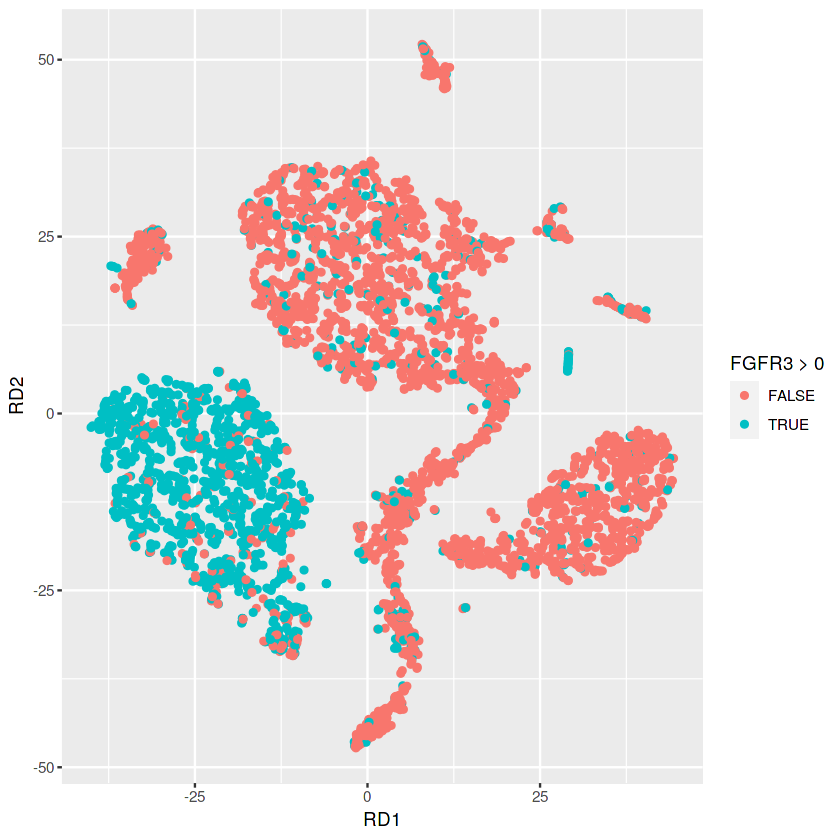

In [34]:
library(ggplot2)
PBMC_DR$FGFR3 = sc1$toc["FGFR3", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = FGFR3 > 0))
plot(gg)

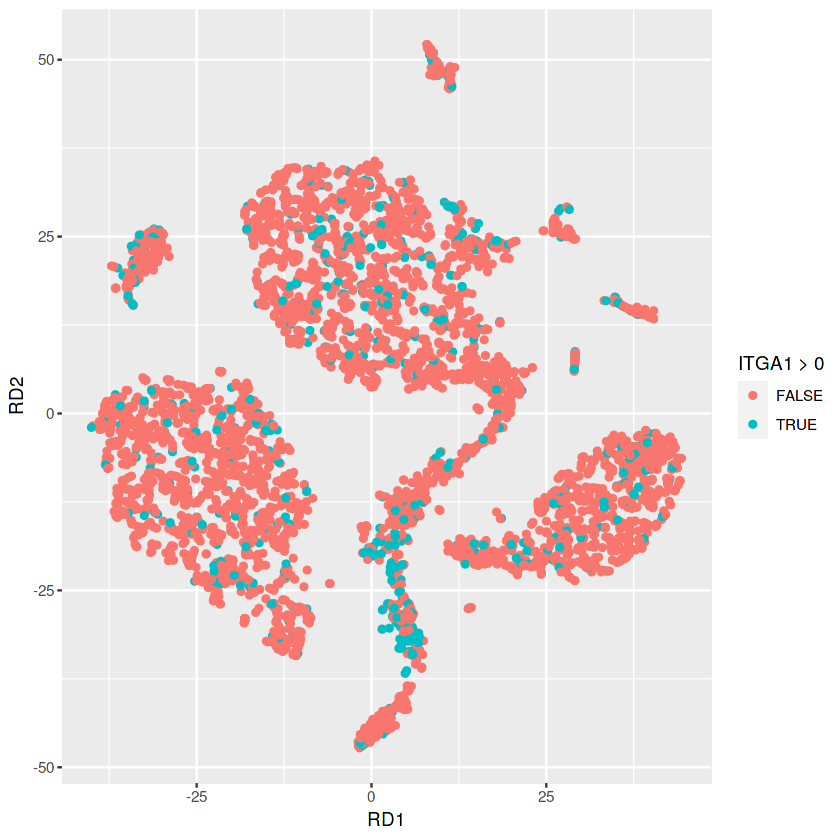

In [35]:
library(ggplot2)
PBMC_DR$ITGA1 = sc1$toc["ITGA1", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = ITGA1 > 0))
plot(gg)

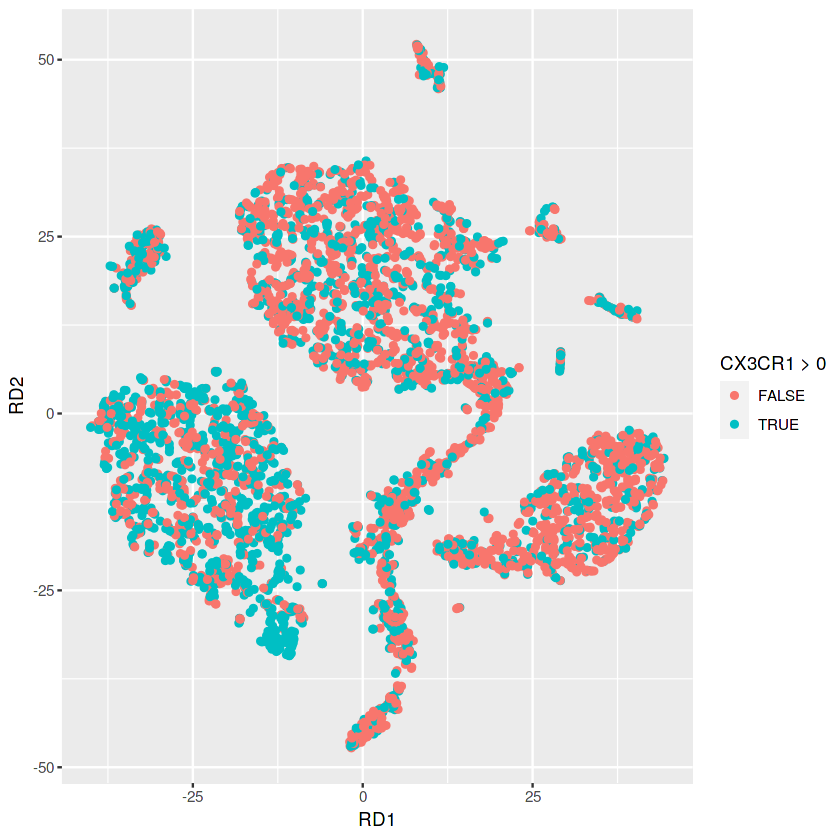

In [36]:
library(ggplot2)
PBMC_DR$CX3CR1 = sc1$toc["GFAP", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = CX3CR1 > 0))
plot(gg)

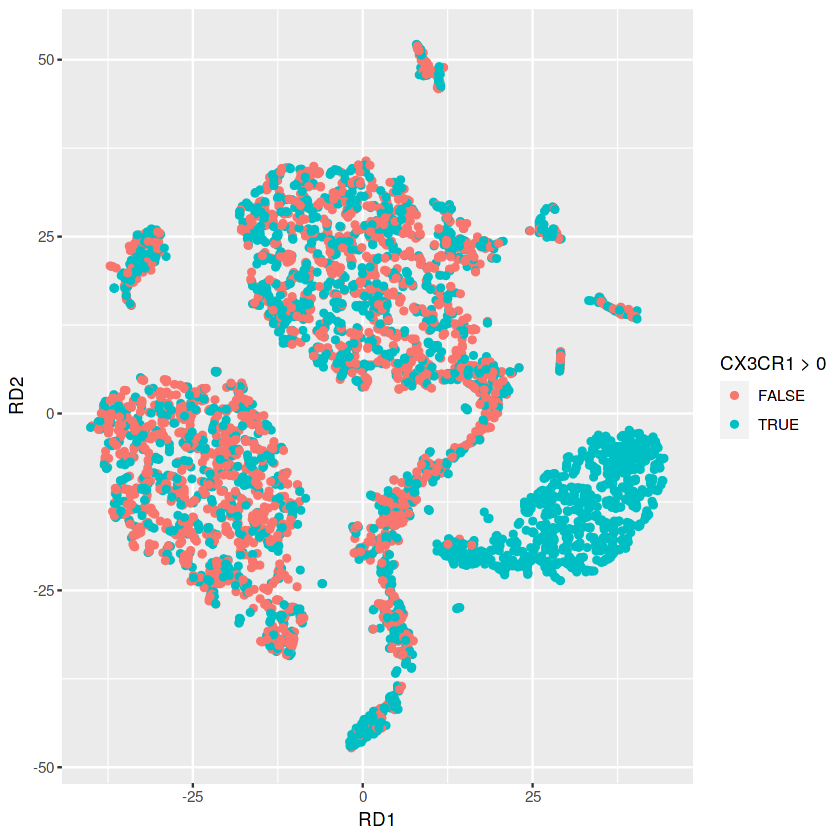

In [37]:
library(ggplot2)
PBMC_DR$CX3CR1 = sc1$toc["MBP", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = CX3CR1 > 0))
plot(gg)

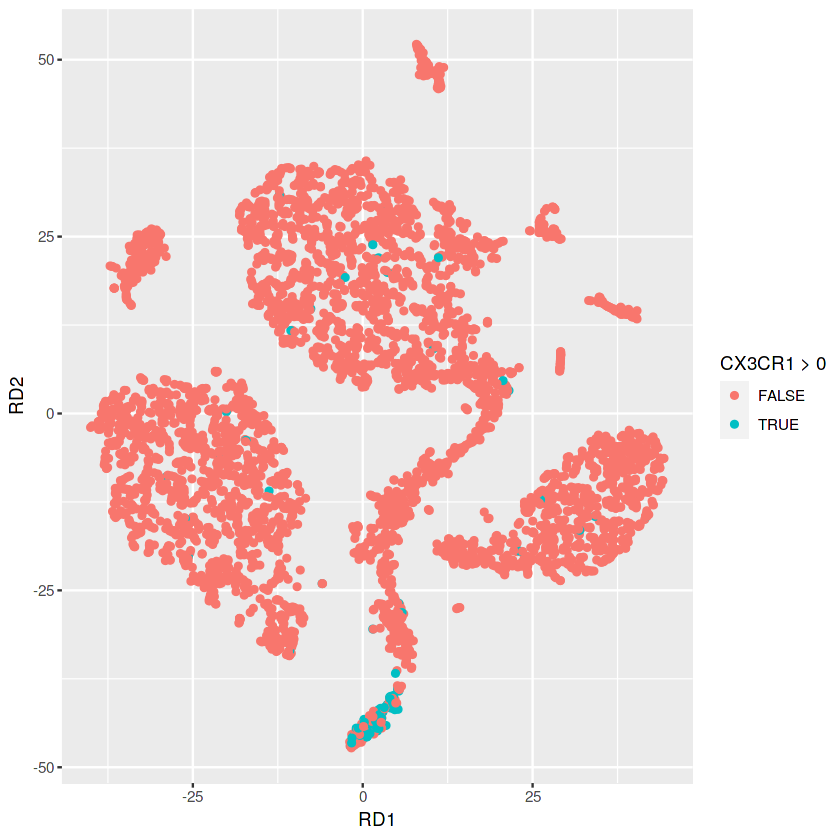

In [38]:
library(ggplot2)
PBMC_DR$CX3CR1 = sc1$toc["CX3CR1", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = CX3CR1 > 0))
plot(gg)

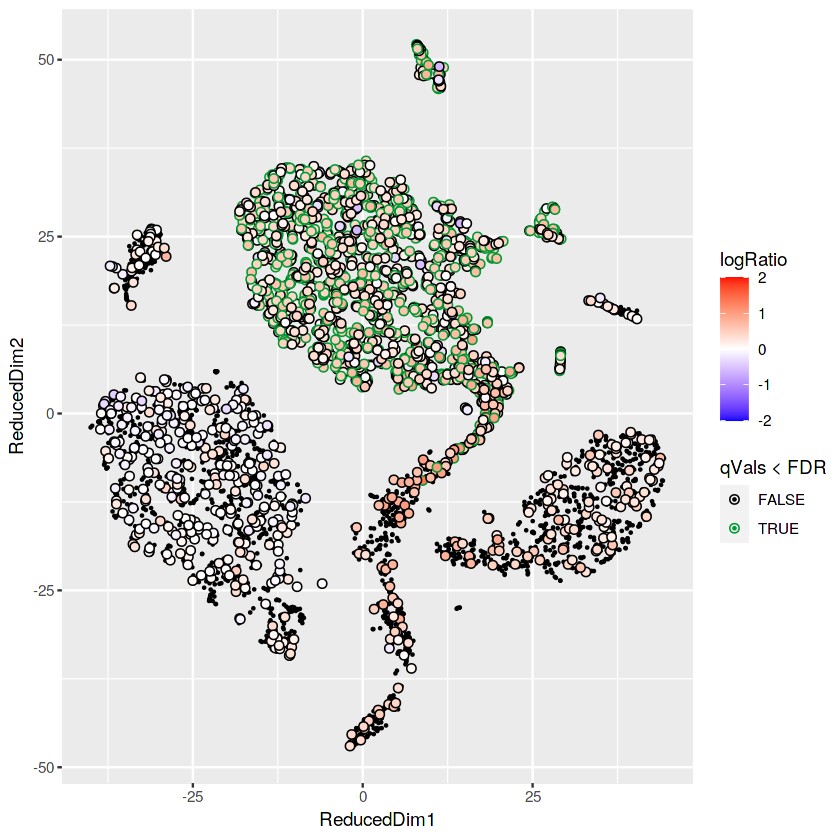

In [39]:
gg = plotMarkerMap(sc1, "RBFOX3", PBMC_DR)
plot(gg)

In [40]:
sc1 = setDR(sc1, PBMC_DR)

Warning message in setDR(sc1, PBMC_DR):
“DR has 12 columns where 2 were expected.  Using first two.”


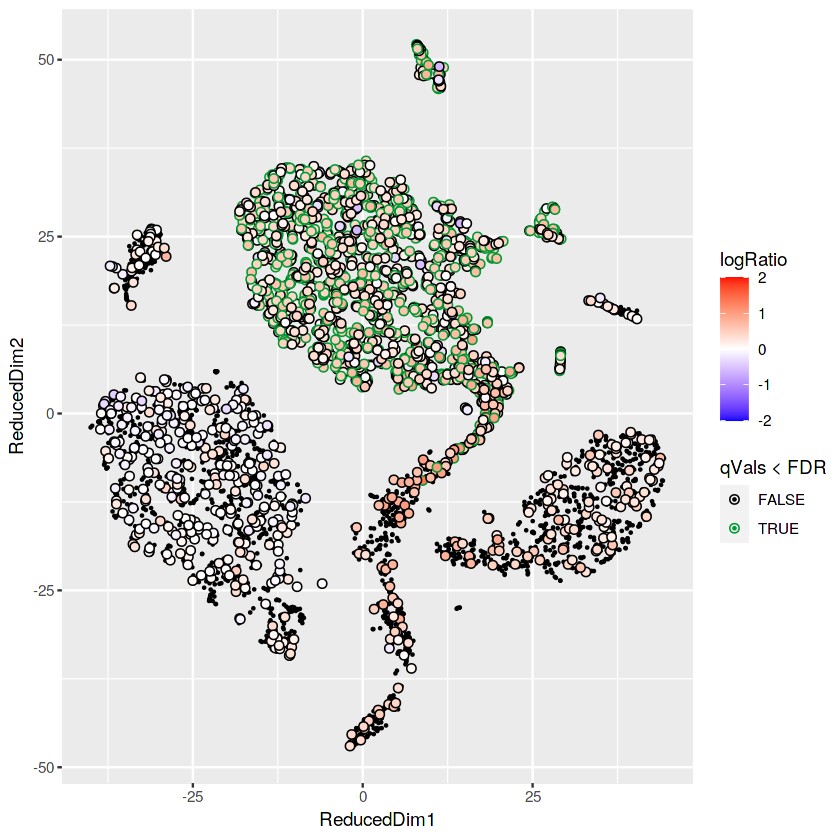

In [41]:
gg = plotMarkerMap(sc1, "RBFOX3")
plot(gg)

In [42]:
sc1 = setContaminationFraction(sc1, 0.2)

In [43]:
head(sc1$soupProfile[order(sc1$soupProfile$est, decreasing = TRUE), ], n = 20)

est         counts
MALAT1     0.042052134 438026
RBFOX1     0.007756430  80793
PHACTR1    0.006949039  72383
AC120193.1 0.005342032  55644
PCDH9      0.004946593  51525
NRXN3      0.004510256  46980
DGKB       0.004434797  46194
GPC5       0.004249125  44260
ROBO2      0.003550026  36978
CADM2      0.003274688  34110
NRXN1      0.003069048  31968
ANKS1B     0.003058295  31856
PDE10A     0.003000021  31249
DLG2       0.002998869  31237
LSAMP      0.002778060  28937
PLCB1      0.002772396  28878
SNHG14     0.002650567  27609
ADGRB3     0.002630790  27403
CSMD1      0.002506850  26112
NLGN1      0.002489473  25931

In [44]:
sc1 = setClusters(sc1, PBMC_DR$Cluster)

No gene lists provided, attempting to find and plot cluster marker genes.

Found 878 marker genes

Warning message:
“Removed 64907 rows containing non-finite values (stat_ydensity).”


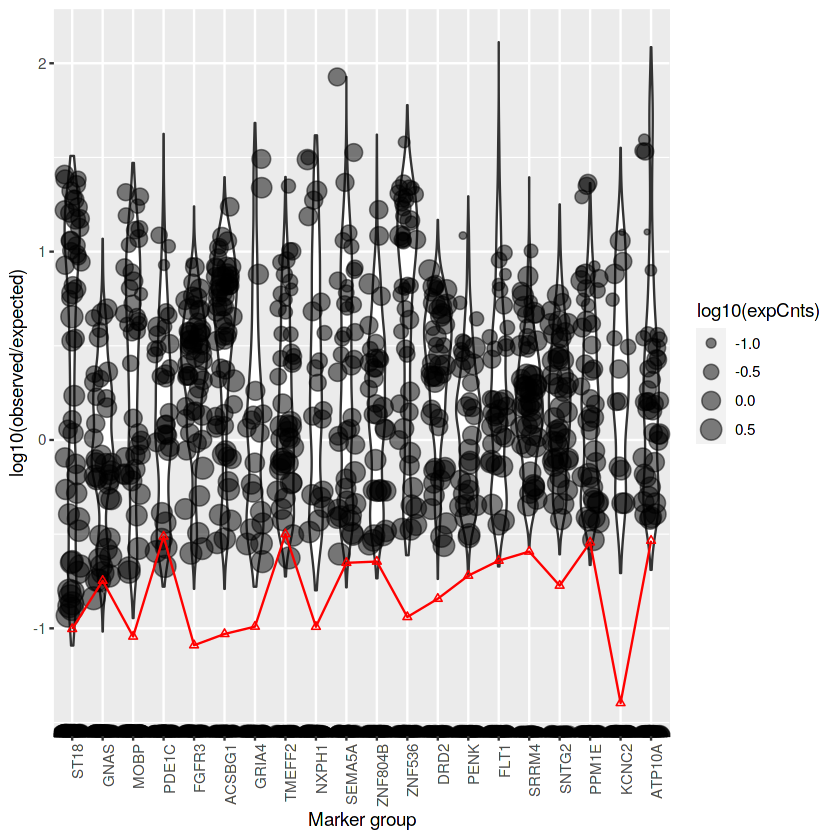

In [45]:
plotMarkerDistribution(sc1)

In [54]:
#str(sc1)

In [45]:
#sc1 = inferNonExpressedGenes(sc1)
##Error in inferNonExpressedGenes(sc1): could not find function "inferNonExpressedGenes"
##Traceback:

In [52]:
igGenes = c("ST18","GNAS","MOBP","PDE1C","FGFR3","ACSBG1","GRIA4","TMEFF2","NXPH1","SEMA5A","ZNF804B","ZNF536","DRD2","PENK","FLT1","SRRM4","SNTG2","PPM1E","KCNC2","ATP10A")

In [53]:
plotMarkerMap(sc1, geneSet = igGenes, DR = PBMC_DR, useToEst = useToEst)

ERROR: Error in plotMarkerMap(sc1, geneSet = igGenes, DR = PBMC_DR, useToEst = useToEst): object 'useToEst' not found


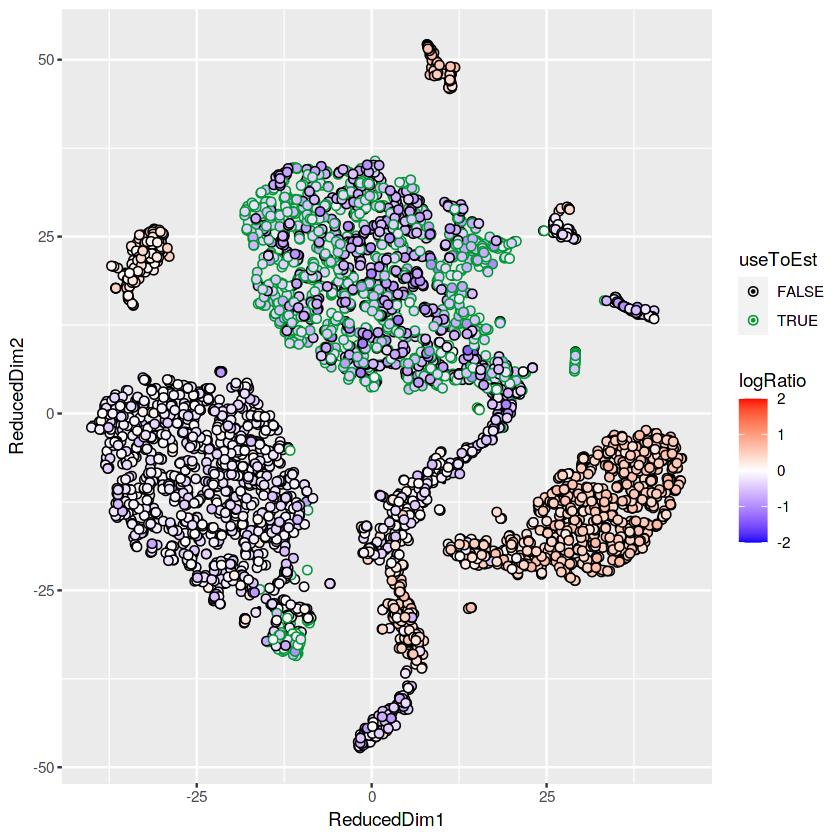

In [54]:
useToEst = estimateNonExpressingCells(sc1, nonExpressedGeneList = list(IG = igGenes), 
    clusters = setNames(PBMC_DR$Cluster, rownames(PBMC_DR)))
plotMarkerMap(sc1, geneSet = igGenes, DR = PBMC_DR, useToEst = useToEst)

In [55]:
sc1 = setClusters(sc1, PBMC_DR$Cluster)

In [56]:
sc1 = calculateContaminationFraction(sc1, list(IG = igGenes), useToEst = useToEst)

Warning message in setContaminationFraction(sc, exp(coef(sc$fit)), forceAccept = forceAccept):
“Estimated contamination is very high (0.37).”
Estimated global contamination fraction of 36.96%



In [57]:
head(sc1$metaData)

nUMIs RD1        RD2       rho       clusters rhoLow  
AAACCCAAGGTAGCCA-1 22585  -5.343104 25.015432 0.3695667 1        0.363949
AAACCCACAGACAAAT-1  3137  17.634598 -2.098579 0.3695667 4        0.363949
AAACCCAGTACCCAGC-1 27079 -12.478315 25.510414 0.3695667 1        0.363949
AAACCCAGTCCTCCTA-1 15757  -3.740670 14.852551 0.3695667 3        0.363949
AAACGAAAGACTGGGT-1  7305 -13.774117 -6.087550 0.3695667 0        0.363949
AAACGAAAGCAGCGAT-1  2782  35.937251 15.189444 0.3695667 11       0.363949
                   rhoHigh  
AAACCCAAGGTAGCCA-1 0.3752417
AAACCCACAGACAAAT-1 0.3752417
AAACCCAGTACCCAGC-1 0.3752417
AAACCCAGTCCTCCTA-1 0.3752417
AAACGAAAGACTGGGT-1 0.3752417
AAACGAAAGCAGCGAT-1 0.3752417

In [59]:
sc1 = calculateContaminationFraction(sc1, list(IG = igGenes), useToEst = useToEst, 
    cellSpecificEstimates = TRUE)
quantile(sc1$metaData$rho)

ERROR: Error in calculateContaminationFraction(sc1, list(IG = igGenes), useToEst = useToEst, : unused argument (cellSpecificEstimates = TRUE)


In [60]:
##Manual alternative
#sc = setContaminationFraction(sc, 0.1)

In [61]:
out = adjustCounts(sc1, clusters = setNames(PBMC_DR$Cluster, rownames(PBMC_DR)))

Expanding counts from 15 clusters to 4420 cells.



In [62]:
library(Matrix)
cntSoggy = rowSums(sc1$toc > 0)
cntStrained = rowSums(out > 0)
mostZeroed = tail(sort((cntSoggy - cntStrained)/cntSoggy), n = 10)
mostZeroed

NDN AC092132.2  C17orf107     BORCS6 AC068418.3 AC084809.2        OXT 
         1          1          1          1          1          1          1 
AC010336.2 AL022337.1     PLA2G3 
         1          1          1

In [63]:
tail(sort(rowSums(sc1$toc > out)/rowSums(sc1$toc > 0)), n = 20)

LINC01694      PCBP3 AL133492.1 AJ011931.2     COL6A1     COL6A2       FTCD 
         1          1          1          1          1          1          1 
   SPATC1L        LSS AP001469.1 MCM3AP-AS1     MCM3AP       YBEY   C21orf58 
         1          1          1          1          1          1          1 
      PCNT   RPL18AP2      DIP2A      S100B      PRMT2     DSTNP1 
         1          1          1          1          1          1

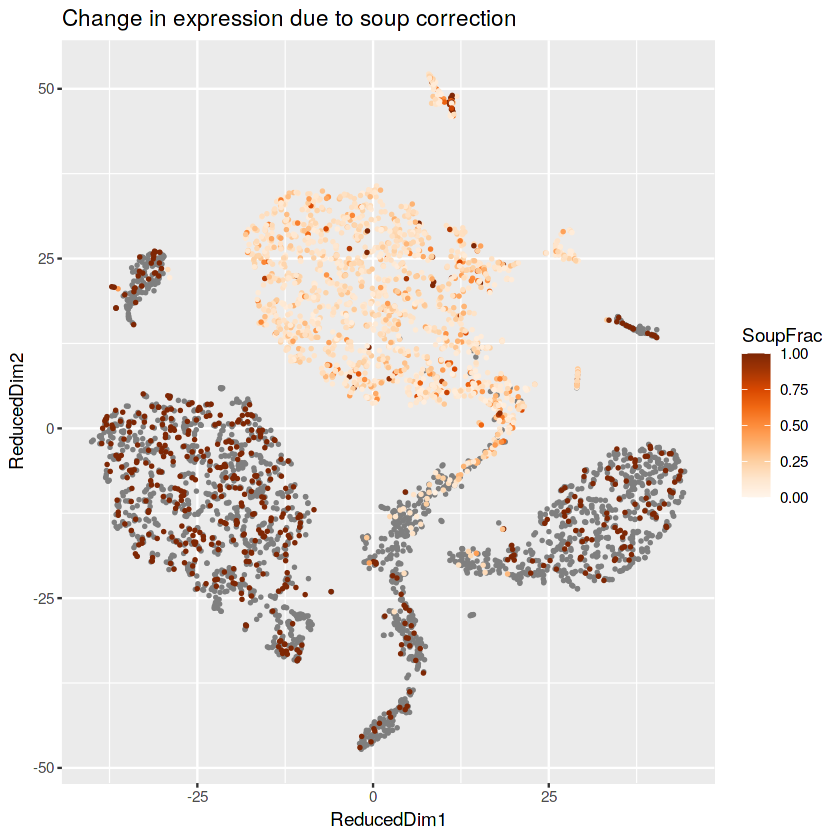

In [64]:
plotChangeMap(sc1, out, "RBFOX3")

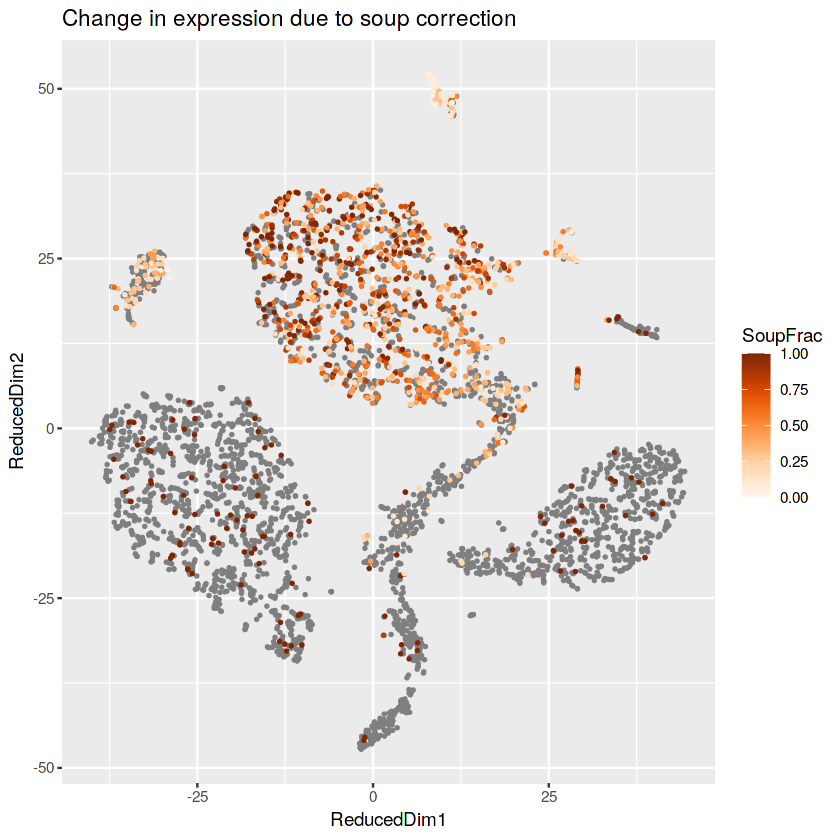

In [65]:
plotChangeMap(sc1, out, "GAD1")

In [ ]:
DropletUtils:::write10xCounts("./strainedCounts_Monkey_P_Caudate_Rep2", out)